In [ ]:
ip = as.data.frame(installed.packages()[,c(1,3:4)])
ip = ip[is.na(ip$Priority),1:2,drop=FALSE]
ip

In [1]:
library(stringdist)

ERROR: Error in library(stringdist): there is no package called ‘stringdist’


In [1]:
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
ppl <- read.csv('tt_people.csv', stringsAsFactors = FALSE)
head(ppl)

recid lname             fname     mname    suffname phone       
1  5    Gray              John      William           8047757683  
2 13    GEBAUER           JULIE     A                 763-552-8888
3 25    Garcia de Quevedo Francisco                   8138888333  
4 31    Graves            Michael   Edwin             6148599921  
5 56    Garcia            Charles   Rienaldo          2813047300  
6 73    Griffith          David     Elliott           215-887-2040

In [5]:
loc <- read.csv('tt_locations.csv', stringsAsFactors = FALSE)
head(loc)

location_id lname     fname  mname phone       
1 100025      GASTON    DANIEL B     805/682-9908
2 100182      GOFF      BARRY        801/565-7135
3 100225      GRACY     MARTIN A     510/569-8860
4 100253      GEYER     DANA   B     970/484-7040
5 100255      GUTIERREZ REY          626/330-6201
6 100268      GONZALES  ALEX   Y     559/784-1100

In [3]:
str(ppl)

'data.frame':	36143 obs. of  6 variables:
 $ recid   : int  5 13 25 31 56 73 77 99 135 166 ...
 $ lname   : chr  "Gray" "GEBAUER" "Garcia de Quevedo" "Graves" ...
 $ fname   : chr  "John" "JULIE" "Francisco" "Michael" ...
 $ mname   : chr  "William" "A" "" "Edwin" ...
 $ suffname: chr  "" "" "" "" ...
 $ phone   : chr  "8047757683" "763-552-8888" "8138888333" "6148599921" ...


In [6]:
str(loc)

'data.frame':	20813 obs. of  5 variables:
 $ location_id: int  100025 100182 100225 100253 100255 100268 100269 100276 100370 100496 ...
 $ lname      : chr  "GASTON" "GOFF" "GRACY" "GEYER" ...
 $ fname      : chr  "DANIEL" "BARRY" "MARTIN" "DANA" ...
 $ mname      : chr  "B" "" "A" "B" ...
 $ phone      : chr  "805/682-9908" "801/565-7135" "510/569-8860" "970/484-7040" ...


In [7]:
n_distinct(ppl$recid)

[1] 36143

In [9]:
n_distinct(loc$location_id)

[1] 19641

In [10]:
loc[duplicated(loc$location_id) | duplicated(loc$location_id[length(loc$location_id):1])[length(loc$location_id):1], ] %>%
    arrange(location_id)

location_id lname              fname       mname phone       
1    65052       GATELY             DEBORAH           909/594-9926
2    65052       GATELY             ELIZABETH         626/912-1551
3    65510       Goldberg           Arthur      L     520/885-0794
4    65510       GOLDBERG           ARTHUR      L     520/885-0794
5    65529       GUYER              GLENN       W     541/928-3863
6    65529       GUYER              BETTE LOU         503/928-3863
7    66263       grodsky            edward            949/251-8500
8    66263       GRODSKY            EDWARD            949/251-8500
9    66273       GIARDE             KAREN       J     425/771-8239
10   66273       GIARDE             DAN         P     206/755-9912
11   66974       GOODWIN            PAT               909/247-2315
12   66974       GOODWIN            WAYNE       E     909/247-2315
13   67059       GRAVES             MICHAEL     J     360/588-8077
14   67059       GRAVES             ROBYN       J     360/588-8077
15   67224       GUZMAN             MARTHA      F     909/829-1777
16   67224       GUZMAN             JUAN                          
17   67746       GRAHAM             DAVID             805/466-7121
18   67746       GRAHAM             JANICE                        
19   67803       GREEN              NORENE            408/674-5562
20   67803       GREEN              THOMAS      H     408/674-5562
21   68136       GREENSPAN          ARTHUR            702/314-9954
22   68136       GREENSPAN          GLORIA            702/228-9388
23   68994       GEASLEN            THOMAS      A     805/709-1048
24   68994       GEASLEN            DEBRA       A     408/985-1693
25   69325       GOLDBERG           JANET             970/945-9811
26   69325       GOLDBERG           HARVEY            970/925-3503
27   69628       GRADY              LINDA       D     562/863-7761
28   69628       GRADY              LINDA             562/863-7761
29   69745       GOMEZ              MERCEDES    B     818/705-5560
30   69745       GOMEZ              BETTY             818/705-5560
⋮    ⋮           ⋮                  ⋮           ⋮     ⋮           
2315 13531616    Gaun               Christopher A     516/759-0217
2316 13531616    Gaun               Lukas       C     516/319-0131
2317 13537220    george             alnanisha         832/926-8332
2318 13537220    george             albert            713/702-1462
2319 13543606    Greenman           Donna             619/846-0986
2320 13543606    Greenman           John              619/846-0986
2321 13547659    GARRETT            KRIS        G     281/889-8033
2322 13547659    GARCIA             JOEL              956/219-8384
2323 13547676    GARRETT            KRIS        G     281/889-8033
2324 13547676    GALVAN             LETICIA           956/378-7275
2325 13574383    Gibson             Angela            509/901-4356
2326 13574383    Gibson             David             503/750-0105
2327 13583484    Galan              Alfredo           281/827-7269
2328 13583484    Galan              Nadrijel          281/827-6975
2329 13591049    gray               Lashon            336/709-4758
2330 13591049    gillis             deshun            336/254-2265
2331 13601167    Gonzalez-Velazquez Vanessa           925/207-6203
2332 13601167    Gabino             Sonia             510/613-3888
2333 13614266    Griffin II         William           409/527-2677
2334 13614266    Griffin            Karen       J     409/656-6019
2335 13620299    Garza              Juana             469/713-4472
2336 13620299    Garza              Carlos      E     361/455-2550
2337 13623880    Gray Reason        Pamela      B     765/278-5677
2338 13623880    Gray Reason        Pamela      B     765/622-4949
2339 13630693    Grassey            Timothy           781/545-1112
2340 13630693    Grassey            Ernest      J     781/545-1112
2341 13633803    Green              Michael           203/483-7333
2342 13633803    Green              Susan       C   

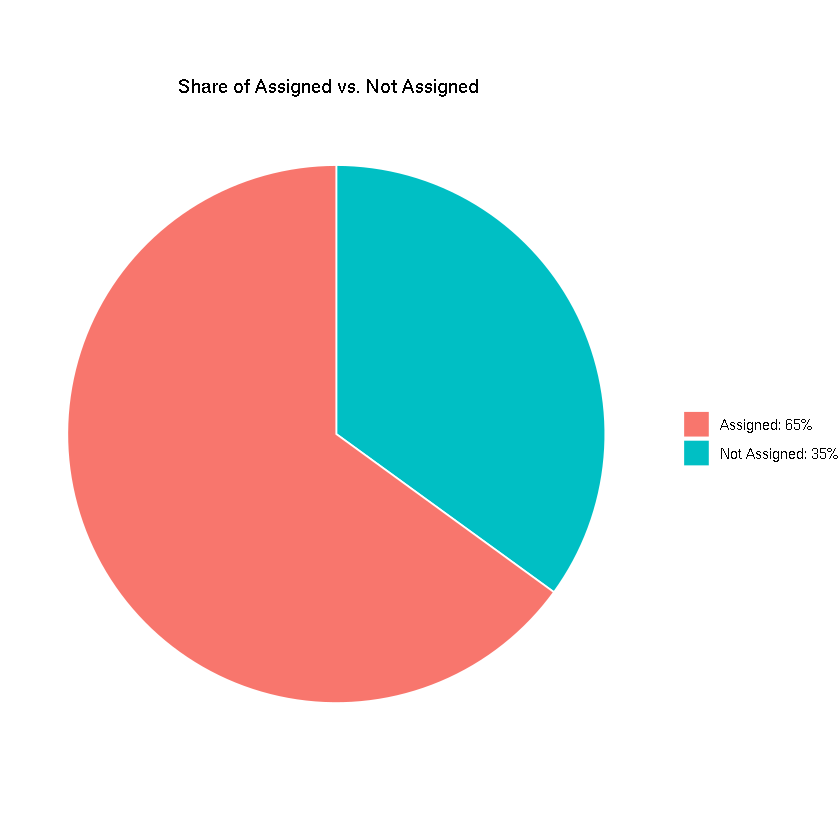

In [46]:
# Load ggplot2
library(ggplot2)

# Create Data
data <- data.frame(
  group=c("Assigned: 65%", "Not Assigned: 35%"),
  value=c(13,7)
)

# Basic piechart
ggplot(data, aes(x="", y=value, fill=group)) +
  geom_bar(stat="identity", width=1, color="white") +
  coord_polar("y", start=0) +
  theme_void() + 
  ggtitle("Share of Assigned vs. Not Assigned") +
  theme(legend.title = element_blank(),
      plot.title = element_text(hjust = 0.48))

In [7]:
# all names to lower case
ppl$lname <- tolower(ppl$lname)
ppl$fname <- tolower(ppl$fname)
ppl$mname <- tolower(ppl$mname)
loc$lname <- tolower(loc$lname)
loc$fname <- tolower(loc$fname)
loc$mname <- tolower(loc$mname)

In [ ]:
locations %>%
group_by(lname) %>%
summarise(count=n()) %>%
filter(count>1) %>%
arrange(desc(count))

In [36]:
ppl %>%
group_by(lname, fname, mname) %>%
summarise(count=n()) %>%
filter(count>1) %>%
arrange(desc(count))

lname     fname      mname    count
1   gonzalez  elizabeth           12   
2   garcia    maria               11   
3   gonzalez  carlos              10   
4   gonzalez  martha               8   
5   garcia    elizabeth            7   
6   garcia    juan                 7   
7   gomez     maria                7   
8   gonzalez  leticia              7   
9   gonzalez  roberto              7   
10  gutierrez veronica             7   
11  garcia    beatriz              6   
12  garcia    cynthia              6   
13  garcia    david                6   
14  garcia    patricia             6   
15  garcia    rafael               6   
16  gonzalez  maria                6   
17  gonzalez  olga                 6   
18  gonzalez  veronica             6   
19  grant     michael              6   
20  green     david                6   
21  gutierrez maria                6   
22  garcia    jesus                5   
23  garcia    jorge                5   
24  garcia    luis       a         5   
25  garcia    margarita            5   
26  garcia    maria      g         5   
27  garcia    veronica             5   
28  garza     melissa              5   
29  gonzalez  arturo               5   
30  gonzalez  hector               5   
⋮   ⋮         ⋮          ⋮        ⋮    
750 gutierrez luis                2    
751 gutierrez luis       eduardo  2    
752 gutierrez maria      cristina 2    
753 gutierrez martha              2    
754 gutierrez melissa             2    
755 gutierrez nancy               2    
756 gutierrez olivia              2    
757 gutierrez orlando             2    
758 gutierrez ricardo             2    
759 gutierrez rosa                2    
760 gutierrez silvia              2    
761 gutierrez sonia               2    
762 gutierrez vanessa             2    
763 gutierrez viridiana           2    
764 gutierrez william             2    
765 guzman    alejandra           2    
766 guzman    angelica            2    
767 guzman    brenda              2    
768 guzman    gabriel             2    
769 guzman    hilda               2    
770 guzman    jacqueline          2    
771 guzman    katherine           2    
772 guzman    lilian              2    
773 guzman    luis                2    
774 guzman    maria               2    
775 guzman    monica              2    
776 guzman    nancy               2    
777 guzman    rodolfo             2    
778 guzman    sergio              2    
779 guzman    zoraida             2

In [ ]:
locations %>%
group_by(location_id) %>%
summarise(count=n()) %>%
arrange(desc(count))

In [8]:
# keep only numbers from phone#
ppl$phone <- gsub("[^0-9]", "", ppl$phone)
loc$phone <- gsub("[^0-9]", "", loc$phone)

In [19]:
# check missing in phone numbers
sum(ppl$phone=="")
sum(loc$phone=="")

[1] 7528

[1] 291

In [41]:
# strict match: 3835 matches
loc %>%
    inner_join(ppl, by = c("lname", "fname", "mname", "phone"))

location_id lname          fname       mname phone      recid  suffname
1    100025      gaston         daniel      b     8056829908 125518         
2    100253      geyer          dana        b     9704847040  33375         
3    100269      gilden         murray      n     8189076395   4451         
4    100925      guthrie        denton            3237220338 293244         
5    101488      gonzalez       juan              8317611207  19526         
6    101638      gerking        lori        s     4028735577 158023         
7    101645      gamett         bruce       w     7024331040 147782         
8    101704      gifford        richard     d     3086354004 168569         
9    101737      gray           clement           2537527528 157822         
10   101919      goldman        kenneth           6509415222  21588         
11   101996      gomez          hortencia         7147481651 295617         
12   102233      gyorkos        john        w     9498377750  67851         
13   102560      grotjahn       anthony           4158971760 234567         
14   102610      goodman        charles     m     8017851510   1280         
15   102718      gonzalez       peter       j     3109378707   5827         
16   102845      gonzales       stephanie                    658704         
17   102917      garrels        annie       b     7148286615 303320         
18   102949      gibb           john        r     5099683541  70975         
19   103154      garner         david       h     4258882180 233529         
20   103267      geertsen       thomas      a     8016018686 143752         
21   103267      geertsen       thomas      a     8016018686 143752         
22   103330      guerrero       irma              3108308992  81197         
23   103712      grassano       mario       h     8188411090 308949         
24   104253      galloway       joan        m     2197852425  98936         
25   104279      garcia         bernardo          6617580157 105245         
26   104312      gross          barbara     j     9169719119 312898         
27   104769      garcia         jaime             7147611762 305810         
28   104801      gregerson      paul        a     7148711040  34560         
29   104890      gonzalez       rosa                         440603         
30   105041      greenspan      kathleen    a     3103652106 227081         
⋮    ⋮           ⋮              ⋮           ⋮     ⋮          ⋮      ⋮       
3806 94212       guimarin       christopher       6029432060 534917         
3807 94234       gross          robert            7079867020  47219         
3808 94727       gray           alan        l     2538527413 147870         
3809 94769       gibson         valarie     j     5309381822  30717         
3810 94934       gray           diane       k     3104523051   5729         
3811 94979       garcia         carlos      g     3237732727  17816         
3812 95162       gonsalves      jennifer    e     5599924118 262611         
3813 96142       gonzalez-rubio yolanda           6269690533 204551         
3814 96152       gray           larry       a     8014923806 273165         
3815 96396       green          larry             6196449142 189059         
3816 96418       guido          florentina        5102640657  24129         
3817 96525       gibson         michael     v     9164841252   2539         
3818 96527       golden         kenneth     s     9095999907 247267         
3819 96722       gonzalez       elizabeth         7024388188 628800         
3820 96796       groshong       robert      w     2535318920 125980         
3821 96831       gorham         david       l     5592252121 117340         
3822 97189       germic         richard           8183685723 104510         
3823 97315       given          geoffrey    c     3108287547  99856         
3824 97437       gutierrez      julie             2088845125 258125         
3825 97489       greising       charles           6194285653  52292         
3

In [21]:
ppl1 = ppl[ppl$phone!="", ]
loc1 = loc[loc$phone!="", ]
str(ppl1)
str(loc1)

'data.frame':	28615 obs. of  6 variables:
 $ recid   : int  5 13 25 31 56 73 77 99 135 166 ...
 $ lname   : chr  "gray" "gebauer" "garcia de quevedo" "graves" ...
 $ fname   : chr  "john" "julie" "francisco" "michael" ...
 $ mname   : chr  "william" "a" "" "edwin" ...
 $ suffname: chr  "" "" "" "" ...
 $ phone   : chr  "8047757683" "7635528888" "8138888333" "6148599921" ...
'data.frame':	20522 obs. of  5 variables:
 $ location_id: int  100025 100182 100225 100253 100255 100268 100269 100276 100370 100496 ...
 $ lname      : chr  "gaston" "goff" "gracy" "geyer" ...
 $ fname      : chr  "daniel" "barry" "martin" "dana" ...
 $ mname      : chr  "b" "" "a" "b" ...
 $ phone      : chr  "8056829908" "8015657135" "5105698860" "9704847040" ...


In [22]:
# check duplicates
sum(duplicated(ppl1$phone))
sum(duplicated(loc1$phone))

[1] 2361

[1] 3151

In [24]:
# 2361 out of 28615 duplicates in ppl
# 3151 out of 20522 duplicates in loc
# let's check what's going on
ppl1[duplicated(ppl1$phone) | duplicated(ppl1$phone[length(ppl1$phone):1])[length(ppl1$phone):1], ] %>%
    arrange(phone)

recid  lname          fname      mname     suffname phone      
1    227074 gainsburg      dolores                       0000000000 
2    351152 gupta          preeti                        0000000000 
3    588693 ghosh          souvick                       03366209018
4    588778 ghosh          avishek                       03366209018
5    598428 ganesh         bhargavi                      04466669000
6    598443 goyal          deepa                         04466669000
7    583000 gupta          saurav                        12129380231
8    589008 g k            karthik                       12129380231
9    311405 gupta          nandita                       1246647000 
10   321166 gupta          brijesh                       1246647000 
11   351447 gusain         subodh                        1246647000 
12   385569 gupta          aloke                         1246647000 
13   415835 gupta          gaurav                        1246647000 
14   417252 grover         pranav                        1246647000 
15    11443 gelb           bradley    l                  15852327046
16    36811 gelb           myrl       s                  15852327046
17    27922 graziani       stephenie  a                  18004725625
18   129106 gaj            mary                          18004725625
19   159386 george         stanley    k                  18004725625
20   361845 gonzales       norma      flores             18004725625
21   468500 gunter         stephanie  elizabeth          18004725625
22   516473 gupta          deepshikha                    18004725625
23   214535 guttilla       rosario                       2012880200 
24   231592 guttilla       filippo                       2012880200 
25   349913 gamero         darrell                       2013427753 
26   558930 gentile-cruz   blanca                        2013427753 
27    60767 gami           rakesh     m                  2014323332 
28   440674 gomez          jacqueline m                  2014323332 
29   281569 gonzalez       andres                        2014364321 
30   281631 gonzalez       julissa    cesarina           2014364321 
⋮    ⋮      ⋮              ⋮          ⋮         ⋮        ⋮          
4107  91744 guidry         gregory    john               9858684056 
4108  92442 guidry         doug                          9858684056 
4109  79972 gautreaux      amy                           9858762743 
4110 250935 guidry         steven     paul               9858762743 
4111 383653 geesling       nikki      h                  9858925850 
4112 452490 girault        john       marshall  III      9858925850 
4113 247618 geiger         marc       andrew             9894975300 
4114 530493 gilbertson     janice     e                  9894975300 
4115   8934 goodman        john                          9897238227 
4116  98857 gaitskill      jeannette                     9897238227 
4117   1694 geitman        cheryl     lee                9897774640 
4118 119997 gladney        maxine                        9897774640 
4119 168522 gentner        robert     leland             9897939830 
4120 532853 green          ryan       michael            9897939830 
4121 125762 gracik         gerald     d.        Jr.      9899845280 
4122 291204 gracik         james      j                  9899845280 
4123 114295 garrett        terry                         9999999999 
4124 134634 goldfarb       sheldon                       9999999999 
4125 252397 goodwin        jeanne                        9999999999 
4126 301667 gujjala        gangadhara r                  9999999999 
4127 308552 gutierrez      efrain                        9999999999 
4128 328158 giedgowd       thomas h   henry              9999999999 
4129 331127 gray           carlo      edward             9999999999 
4130 342140 gill           martin     f                  9999999999 
4131 354358 garza          guadalupe  j                  9999999999 
4132 406953 gasca granados ana        a                  9999999999 
413

In [32]:
loc1[duplicated(loc1$phone) | duplicated(loc1$phone[length(loc1$phone):1])[length(loc1$phone):1], ] %>%
    arrange(phone)

location_id lname      fname     mname phone     
1    13556396    gonzalez   veronica        2012400568
2     2303601    gonzalez   veronica        2012400568
3     1820349    gupta      sudhir          2013042498
4     2507532    gupta      sudhir          2013042498
5     2107968    goldman    louis     a     2013859800
6     2483876    goldman    louis     a     2013859800
7     1824649    goss       arlene          2014043486
8     2047553    goss       harvey          2014043486
9     2349702    goss       harvey          2014043486
10    2423880    goss       harvey          2014043486
11    2496679    goss       harvey          2014043486
12   13582280    goldenberg louis     s     2014102171
13   13627226    goldenberg louis     s     2014102171
14    1448736    goyal      sangeeta        2014847186
15    1620013    goyal      sangeeta        2014847186
16    2330553    garcia     catherine a     2016477570
17    2430569    garcia     catherine a     2016477570
18     195534    goodman    david     j     2017918300
19     195534    goodman    david     j     2017918300
20     616007    greenwald  meryl     b     2018635348
21     616007    greenwald  janet     l     2018635348
22   13562064    gabbay     ofer      e     2018831000
23     626252    gabbay     ofer      e     2018831000
24    1239911    garbarini  paul      w     2019335566
25    1239911    garbarini  paul      c     2019335566
26   13545029    garcia     karen     j     2019720322
27   13548482    garcia     karen           2019720322
28    2408542    gaskins    rachel          2022856268
29    2485878    gaskins    rachel          2022856268
30    1161830    gbekie     leo             2023900666
⋮    ⋮           ⋮          ⋮         ⋮     ⋮         
4604  2244584    golle      debra     m     9737288787
4605 13526085    guevara    maria           9738797036
4606  2243243    guevara    maria           9738797036
4607  2263651    geffrard   frito           9739962775
4608  2498653    geffrard   frito           9739962775
4609 13567500    gonzalez   alexis          9739979408
4610  2434086    gonzalez   alexis          9739979408
4611 13567465    gallo      thomas    o     9785326351
4612   615920    gallo      thomas    o     9785326351
4613   820525    guzas      robert    p     9786923493
4614   820525    guzas      robert    p     9786923493
4615  1160700    goguen     sheryl    a     9788888029
4616 13639804    goguen     sheryl    a     9788888029
4617   816934    gordon     stanley         9789273900
4618   816934    gordon     jason     m     9789273900
4619   220814    gibson     phillip   m     9798467727
4620   220814    gibson     bobbie          9798467727
4621  1651799    gutierrez  edwin           9804758700
4622  2531317    gutierrez  edwin           9804758700
4623 13594169    gantt      tomesha   s     9806211794
4624 13597302    gantt      tomesha         9806211794
4625  2393936    gourgues   melissa   a     9857747795
4626  2394492    gourgues   melissa         9857747795
4627  2394493    gourgues   melissa         9857747795
4628   175533    guidry     gregory   j     9858684056
4629   175533    guidry     doug            9858684056
4630   869360    garrett    james     j     9858927876
4631   869360    garrett    james     j     9858927876
4632   732882    gros       patrick   j     9858983512
4633   732882    gros       kimberly  v     9858983512

In [16]:
ppl[duplicated(ppl$phone) | duplicated(ppl$phone[length(ppl$phone):1])[length(ppl$phone):1], ]

recid  lname            fname      mname     suffname phone     
16     258   granston         beresford                               
19     295   gong             william                       5592266664
33     652   garcia           mary ann   avila                        
34     668   gillies          katherine                               
40     841   gorski           ronald     l                  5867310044
44     909   gorham           julie      d                  6606464488
59    1147   garretson        shelly     marie              5596880655
61    1178   gallo            ryan                                    
70    1268   greene           shaun      calvin                       
77    1393   greco            michael    vincent            2392757766
83    1433   gamboa           gustavo                       8477580338
85    1484   green            patricia   j.                           
94    1694   geitman          cheryl     lee                9897774640
96    1713   griffith         geoffrey   k                  6063291811
97    1720   gambino          frank                                   
98    1728   gillespie        daniel                                  
101   1803   greenwell        joellen                       2563401110
109   2019   grover           carole     lee                          
111   2098   guitelli         patricia   e                  5164335818
112   2132   guillermo        gay                           9252654421
126   2415   granados         campo      elias              3057731594
130   2473   goy              donald     james              8155393614
131   2485   gahan            steven     francis            8155393614
144   2639   goedert          sheryll    ann                3527325601
149   2706   gniadek          joan       m                  5087471456
151   2730   goy              andra      lee                8155393614
154   2826   greslo           tami       a                            
157   2855   gore             theresa                                 
161   2958   gonzalez         raul       francisco                    
169   3108   garofalo         philip     m                  6098372156
⋮     ⋮      ⋮                ⋮          ⋮         ⋮        ⋮         
36051 665440 gaspar           laura      beatriz            6237729580
36061 665746 guillaume        wislene                                 
36065 665800 gutierrez        veronica                                
36066 665801 griffiths        courtney                                
36070 665895 gerhart          paul                                    
36074 666002 gorostieta       sara       isabel                       
36076 666032 gfeller          brandon    m                            
36080 666101 garcia hernandez marcela                                 
36081 666109 ganaway          laterra    d                            
36085 666200 gu               jenny                                   
36090 666304 godfrey          tori                                    
36091 666314 gandy            sharee     d                            
36092 666335 goodman          maury      charles                      
36094 666355 gantt            kimberly                                
36097 666380 gillard          john       c                            
36101 666448 garcia           nelly      t                            
36102 666455 garswah          saundria                                
36103 666493 granados         christina                               
36104 666522 giles            terrenesha                              
36105 666556 giri             arpan                                   
36106 666584 goodman          eboni                                   
36108 666596 guadeloupe       lerima     temisha                      
36112 666750 gower            kendal     elizabeth          2054432500
36115 666780 garrison         ashley                                  
36120 666876 garza            

In [38]:
ppl %>%
    filter(nchar(phone)>10)
    

recid  lname                   fname        mname       suffname
1    10514 george                  koshy        puthukkeril         
2    10642 glover                  marian       rebecca             
3    11443 gelb                    bradley      l                   
4    13173 groves                  cherrie      m                   
5    27922 graziani                stephenie    a                   
6    28140 gordon                  noemi        cahilig             
7    33247 gargone                 robert       w                   
8    36811 gelb                    myrl         s                   
9    38472 gerton                  debra                            
10   50961 goldburd                jacob                            
11   60559 george                  janelle                          
12   63119 gee                     frank        f                   
13   93128 greenwood               robert       john                
14  103080 georgiev                lyubomir     g                   
15  104726 graham                  george       g                   
16  107962 gray                    anthony      charles             
17  108278 gayheart                jill         esther              
18  118794 gonzalez                ingrid       c                   
19  127286 grilliot                richard      emanuel             
20  129095 gehman                  twila        d                   
21  129106 gaj                     mary                             
22  131883 gray                    robert                           
23  133209 godek                   ashley                           
24  137108 gaste                   maryam                           
25  140752 gettle                  gregory      h                   
26  147439 goel                    ashish                           
27  159386 george                  stanley      k                   
28  160374 gichuhi                 charles                          
29  167966 good                    stewart                          
30  170125 grant                   bonnie       j                   
⋮   ⋮      ⋮                       ⋮            ⋮           ⋮       
319 604146 geetha balasubramaniyan priyanka                         
320 604829 gray                    brandi                           
321 605837 ghatbale                vishaal                          
322 614833 govindraju              mamatha                          
323 617676 g                       renjini                          
324 618722 gagne                   maryanne                         
325 619164 gidon                   vincent      ghislain            
326 622781 george                  keenan       d                   
327 623071 gallagher               carol        a                   
328 627324 gentry                  teriyani                         
329 631681 gao                     jing                             
330 633810 good                    adrianne                         
331 635001 gadde                   yasasvi                          
332 640350 gandhi                  pawan        kumar       Mr      
333 645537 gultepe-arfin           gulen                            
334 649133 grissom                 octavia      lynette             
335 649379 glover                  shauntae                         
336 649641 guess                   carean                           
337 651999 gregory                 amber        kristen             
338 652856 guo                     yunying                          
339 656217 gudijanto               caroline     rachel              
340 656671 godwin                  donna                            
341 658516 guerrier                esther       d                   
342 662102 gandham                 vishnu anand kumar       Mr.     
343 662435 godoy                   tomas        roberto             
344 662656 garcia                  carlos       herman              
34

In [39]:
ppl %>%
    filter(nchar(phone)<10) %>%
    filter(nchar(phone)>0)

recid  lname           fname       mname     suffname phone    
1     607 gray            lawrence    seth               516484991
2   22107 gargano         raymond     john               304693366
3   30256 gedeon          frantz                         561261950
4   56863 garrett         dana        l                  936763417
5   90635 goldstein       harold                         561630697
6   90733 gowdy           james       m                  936329500
7   97919 guerrero        elizabeth   saucedo            3261040  
8  105511 greenia         joel        m                  408733490
9  119506 getzel          michael     seth               516928500
10 122124 goodyear        kathleen                       214686850
11 128226 gore            daniel      mark               5927827  
12 129051 gupta           priti                          623993224
13 184382 groth           kari                           323753933
14 190106 gengo           karen       l                  716416700
15 225249 guild           james       s                  417834900
16 229563 guha majumdar   arpita                         44046000 
17 243338 griesbeck       florian                        49899282 
18 285963 gonzalez        maria       a                  806435582
19 293594 garcia          leticia     c                  805524478
20 293637 gnanavel        arulkumaran                    66813596 
21 293676 gobidesi        anil kumar                     66669459 
22 306642 gerken          sue anne    m                  716554237
23 313020 gubba           rajendra    kumar              67620935 
24 314564 gowlikar        anil        kumar              672990674
25 345111 guerrero        anna                           210313895
26 375690 giles           ruzanna     kniazyan           9459822  
27 390461 grassmyer       lori        ann                9401944  
28 418649 gupta           satyam                         406746000
29 422425 graham          shelby      n                  612332550
30 435542 gonzalez adams  meilyng                        213      
⋮  ⋮      ⋮               ⋮           ⋮         ⋮        ⋮        
42 520691 garcia          patricia                       685536907
43 521680 glenn           kerry                          342917782
44 526424 garcia          jose        l                  918      
45 528669 garcia          miguel                         07031    
46 529023 griffith        temperance                     6436683  
47 533751 gupta           tanya                          993051591
48 546630 gladney-spence  ashunti     tiese              18331040 
49 561856 garcia becerra  olivia                         705375906
50 567305 giniewicz       sherry      lynn               603935   
51 568028 grimm           misti                          319373700
52 569501 gonzalez        marisa                         432272360
53 570981 griffin         comoneicke  dachell            504799970
54 571232 gahakanyi       michel      n                  806817154
55 577202 galloway        aujanae                        404335837
56 580345 galvis          ana         paola              818592200
57 584383 gowda           megha                          080681300
58 584779 gnanabhavan     chamanthy   arabi              450723177
59 588131 givens          jejuan                         313471424
60 597318 gattis          jenny       l                  806674732
61 599522 graham          cristina    faye               360      
62 613188 grandison       ranita                         941730725
63 626635 gibbs           veola                          662240988
64 627332 gaiter          lynzi                          510779423
65 630457 garard thompson dana        lee                620724440
66 637676 garcia          stefane     jacklynne          2591149  
67 641485 gaffud          john howard                    26870967 
68 641516 ghosh           ayantika                       44046564 
69 643572 gannett         guadalupe   c           

In [29]:
word <- "12qwertyuiop"
substr(word,(nchar(word)+1)-10,nchar(word))

[1] "qwertyuiop"

In [30]:
# get last 10 digits
get_ten <- function(word){
    substr(word,(nchar(word)+1)-10,nchar(word))
}

In [31]:
get_ten(word)

[1] "qwertyuiop"